In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
portfolio = pd.read_csv('./crisis_portfolio.csv', index_col=0, parse_dates=True, date_format='%d/%m/%Y')
portfolio.head()

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,481.799988,55.520000,104.040001,39.009998
2005-01-03,482.700012,55.900002,104.949997,39.150002
2005-01-04,478.600006,55.299999,104.269997,38.410000
2005-01-05,484.600006,54.980000,103.800003,38.490002
2005-01-06,489.299988,56.279999,105.230003,38.709999


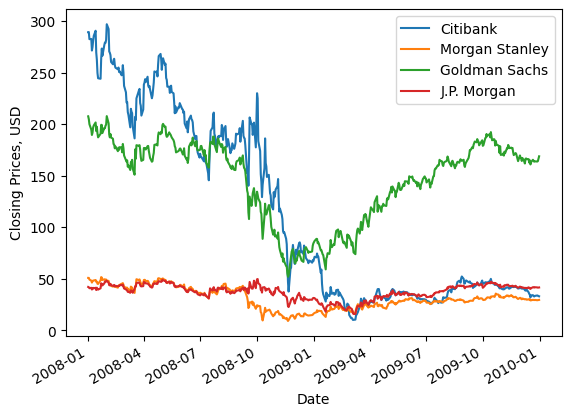

In [8]:
# Select portfolio asset prices for the middle of the crisis, 2008-2009
asset_prices = portfolio.loc['2008-01-01':'2009-12-31']

# Plot portfolio's asset prices during this time
asset_prices.plot().set_ylabel("Closing Prices, USD")

# Show plot
plt.show()

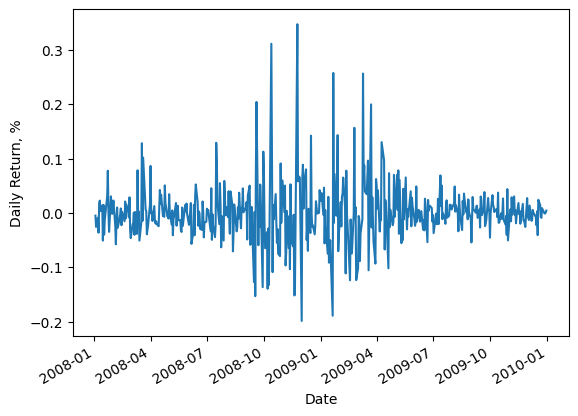

In [10]:
weights = [0.25, 0.25, 0.25, 0.25] 
# Compute the portfolio's daily returns
asset_returns = asset_prices.pct_change()
portfolio_returns = asset_returns.dot(weights)

# Plot portfolio returns 
portfolio_returns.plot().set_ylabel("Daily Return, %")
plt.show()

In [11]:
# Generate the covariance matrix from portfolio asset's returns
covariance = asset_returns.cov()

# Annualize the covariance using 252 trading days per year
covariance = covariance * 252

# Display the covariance matrix
print(covariance)

                Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        1.475195        0.821707       0.573790     0.724639
Morgan Stanley  0.821707        1.298341       0.658895     0.560523
Goldman Sachs   0.573790        0.658895       0.500807     0.426979
J.P. Morgan     0.724639        0.560523       0.426979     0.685584


Calculate the 30-day rolling window returns_windowed using the .rolling() method of portfolio_returns.

Compute series volatility using the .std() method of returns_windowed, multiplying by the .sqrt() of the number of trading days (252).



In [12]:
# Compute and display portfolio volatility for 2008 - 2009
portfolio_variance = np.transpose(weights) @ covariance @ weights
portfolio_volatility = np.sqrt(portfolio_variance)
print(portfolio_volatility)

0.8475328513962702


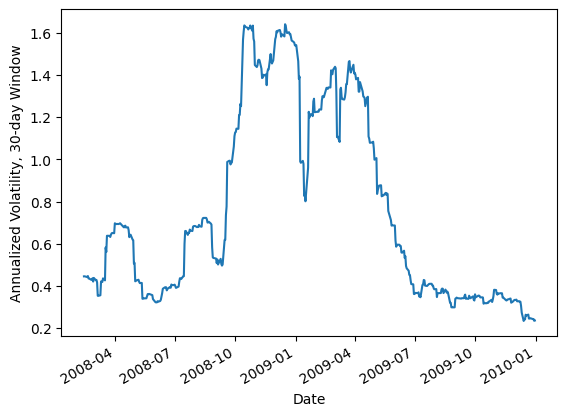

In [13]:
# Calculate the 30-day rolling window of portfolio returns
returns_windowed = portfolio_returns.rolling(30)

# Compute the annualized volatility series
volatility_series = returns_windowed.std()*np.sqrt(252)

# Plot the portfolio volatility
volatility_series.plot().set_ylabel("Annualized Volatility, 30-day Window")
plt.show()

In [14]:
returns = portfolio.pct_change()
returns.head()

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,NaN,NaN,NaN,NaN
2005-01-03,0.001868,0.006844,0.008747,0.003589
2005-01-04,-0.008494,-0.010734,-0.006479,-0.018902
2005-01-05,0.012537,-0.005787,-0.004507,0.002083
2005-01-06,0.009699,0.023645,0.013776,0.005716


In [15]:
returns = returns.Citibank

In [16]:
# Convert daily returns to quarterly average returns
returns_q = returns.resample('Q').mean()

# Examine the beginning of the quarterly series
print(returns_q.head())

# Now convert daily returns to weekly minimum returns
returns_w = returns.resample('W').min()

# Examine the beginning of the weekly series
print(returns_w.head())

Date
2004-12-31         NaN
2005-03-31   -0.001105
2005-06-30    0.000470
2005-09-30   -0.000214
2005-12-31    0.001043
Freq: Q-DEC, Name: Citibank, dtype: float64
Date
2005-01-02         NaN
2005-01-09   -0.008494
2005-01-16   -0.009777
2005-01-23   -0.005620
2005-01-30   -0.003707
Freq: W-SUN, Name: Citibank, dtype: float64


In [21]:
mort_del = pd.read_csv('./mortgage_delinquency.csv', index_col=0, parse_dates=True)

In [26]:
mort_del

,Mortgage Delinquency Rate
Date,
2005-03-31,0.0155
2005-06-30,0.0159
2005-09-30,0.0163
2005-12-31,0.0161
2006-03-31,0.0162
2006-06-30,0.0174
2006-09-30,0.0192
2006-12-31,0.0208
2007-03-31,0.0231


In [30]:
portfolio_returns = returns

In [31]:
portfolio_returns.resample('Q').mean().dropna()

Date
2005-03-31   -0.001105
2005-06-30    0.000470
2005-09-30   -0.000214
2005-12-31    0.001043
2006-03-31   -0.000393
2006-06-30    0.000391
2006-09-30    0.000490
2006-12-31    0.001859
2007-03-31   -0.001265
2007-06-30    0.000040
2007-09-30   -0.001326
2007-12-31   -0.006824
2008-03-31   -0.004462
2008-06-30   -0.003373
2008-09-30    0.005301
2008-12-31   -0.010607
2009-03-31   -0.006239
2009-06-30    0.004311
2009-09-30    0.008694
2009-12-31   -0.005566
2010-03-31    0.003647
2010-06-30   -0.000728
2010-09-30    0.000783
2010-12-31    0.003315
Freq: Q-DEC, Name: Citibank, dtype: float64

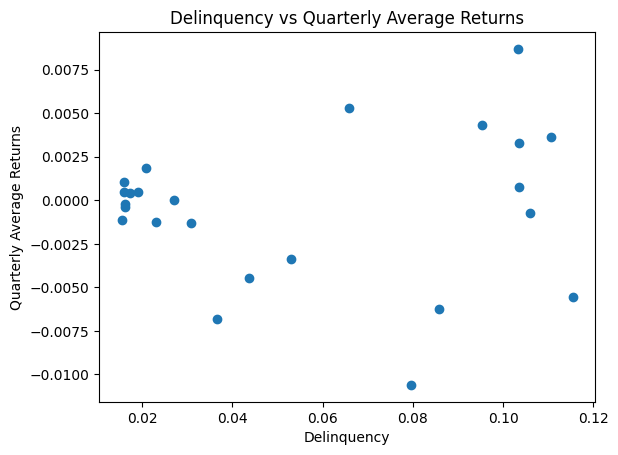

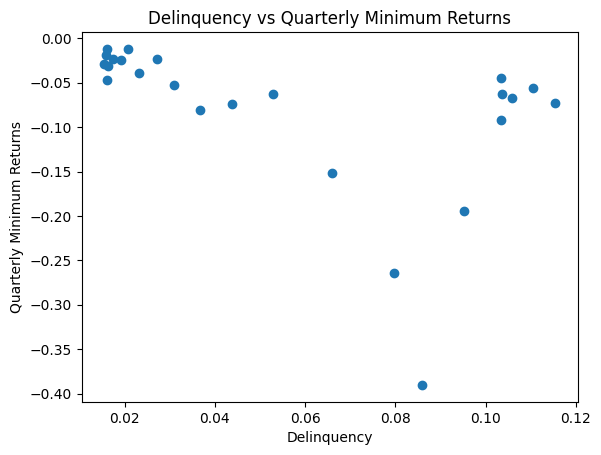

In [35]:
# Transform the daily portfolio_returns into quarterly average returns
portfolio_q_average = portfolio_returns.resample('Q').mean().dropna()

# Create a scatterplot between delinquency and quarterly average returns
plt.scatter(mort_del, portfolio_q_average)
plt.title("Delinquency vs Quarterly Average Returns")
plt.xlabel("Delinquency")
plt.ylabel("Quarterly Average Returns")
plt.show()

# Transform daily portfolio_returns returns into quarterly minimum returns
portfolio_q_min = portfolio_returns.resample('Q').min().dropna()

# Create a scatterplot between delinquency and quarterly minimum returns
plt.scatter(mort_del, portfolio_q_min)
plt.title("Delinquency vs Quarterly Minimum Returns")
plt.xlabel("Delinquency")
plt.ylabel("Quarterly Minimum Returns")

plt.show()

In [40]:
# !pip install statsmodels

In [45]:
port_q_mean =  portfolio_returns.resample('Q').mean().dropna()

In [46]:
import statsmodels.api as sm    
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Citibank   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.034
Method:                 Least Squares   F-statistic:                    0.2456
Date:                Sat, 02 Dec 2023   Prob (F-statistic):              0.625
Time:                        10:26:56   Log-Likelihood:                 97.745
No. Observations:                  24   AIC:                            -191.5
Df Residuals:                      22   BIC:                            -189.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [47]:
port_q_min = portfolio_returns.resample('Q').min().dropna()

In [48]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(port_q_min, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Citibank   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5.592
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0273
Time:                        10:28:11   Log-Likelihood:                 27.226
No. Observations:                  24   AIC:                            -50.45
Df Residuals:                      22   BIC:                            -48.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
vol_q_mean = portfolio_returns.resample('Q').std().dropna()

In [51]:
# Add a constant to the regression
mort_del = sm.add_constant(mort_del)

# Create the regression factor model and fit it to the data
results = sm.OLS(vol_q_mean, mort_del).fit()

# Print a summary of the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Citibank   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     6.282
Date:                Sat, 02 Dec 2023   Prob (F-statistic):             0.0201
Time:                        10:29:36   Log-Likelihood:                 50.158
No. Observations:                  24   AIC:                            -96.32
Df Residuals:                      22   BIC:                            -93.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [54]:
# Load the investment portfolio price data into the price variable.
prices = pd.read_csv("./crisis_portfolio.csv")

# Convert the 'Date' column to a datetime index
prices['Date'] = pd.to_datetime(prices['Date'], format='%d/%m/%Y')
prices.set_index(['Date'], inplace = True)
prices.head()

,Citibank,Morgan Stanley,Goldman Sachs,J.P. Morgan
Date,,,,
2004-12-31,481.799988,55.520000,104.040001,39.009998
2005-01-03,482.700012,55.900002,104.949997,39.150002
2005-01-04,478.600006,55.299999,104.269997,38.410000
2005-01-05,484.600006,54.980000,103.800003,38.490002
2005-01-06,489.299988,56.279999,105.230003,38.709999


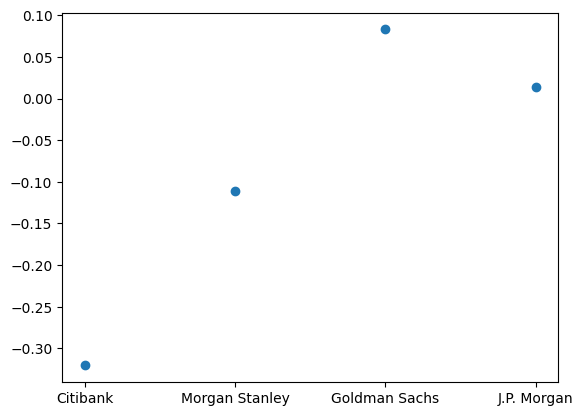

In [55]:
# Import the mean_historical_return method
from pypfopt.expected_returns import mean_historical_return

# Compute the annualized average historical return
mean_returns = mean_historical_return(prices, frequency = 252)

# Plot the annualized average historical return
plt.plot(mean_returns, linestyle = 'None', marker = 'o')
plt.show()

In [62]:
from pypfopt.risk_models import CovarianceShrinkage 
# Create an instance of the CovarianceShrinkage class
cs = CovarianceShrinkage(prices)
# Compute the sample covariance matrix of returns
sample_cov = prices.pct_change().cov() * 252

# Compute the efficient covariance matrix of returns
e_cov = cs.ledoit_wolf()

# Display both the sample covariance_matrix and the efficient e_cov estimate
print("Sample Covariance Matrix\n", sample_cov, "\n")
print("Efficient Covariance Matrix\n", e_cov, "\n")

Sample Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.536214        0.305045       0.217993     0.269784
Morgan Stanley  0.305045        0.491993       0.258625     0.218310
Goldman Sachs   0.217993        0.258625       0.217686     0.170937
J.P. Morgan     0.269784        0.218310       0.170937     0.264315 

Efficient Covariance Matrix
                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.527505        0.288782       0.206371     0.255401
Morgan Stanley  0.288782        0.485642       0.244837     0.206671
Goldman Sachs   0.206371        0.244837       0.225959     0.161823
J.P. Morgan     0.255401        0.206671       0.161823     0.270102 



In [65]:
# Create a dictionary of time periods (or 'epochs')
epochs = { 'before' : {'start': '1-1-2005', 'end': '31-12-2006'},
           'during' : {'start': '1-1-2007', 'end': '31-12-2008'},
           'after'  : {'start': '1-1-2009', 'end': '31-12-2010'}
         }

# Compute the efficient covariance for each epoch
e_cov = {}
for x in epochs.keys():
  sub_price = prices.loc[epochs[x]['start']:epochs[x]['end']]
  e_cov[x] = CovarianceShrinkage(sub_price).ledoit_wolf()

# Display the efficient covariance matrices for all epochs
print("Efficient Covariance Matrices\n", e_cov)

Efficient Covariance Matrices
 {'before':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.018149        0.013789       0.013183     0.013523
Morgan Stanley  0.013789        0.043021       0.030559     0.016525
Goldman Sachs   0.013183        0.030559       0.044482     0.018237
J.P. Morgan     0.013523        0.016525       0.018237     0.024182, 'during':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.713035        0.465336       0.323977     0.364848
Morgan Stanley  0.465336        0.994390       0.434874     0.298613
Goldman Sachs   0.323977        0.434874       0.408773     0.224668
J.P. Morgan     0.364848        0.298613       0.224668     0.422516, 'after':                 Citibank  Morgan Stanley  Goldman Sachs  J.P. Morgan
Citibank        0.841156        0.344939       0.252684     0.356788
Morgan Stanley  0.344939        0.388839       0.231624     0.279727
Goldman Sachs   0.252684        0.231624

In [70]:
from pypfopt.cla import CLA


In [79]:
returns_during = pd.DataFrame({"":{'Morgan Stanley': -0.5574100843500654,
 'Goldman Sachs': -0.35214754282662186,
 'J.P. Morgan': -0.1904514981700287}})
returns_during = returns_during.T
returns_during = returns_during.T.rename(columns={"": "Returns"})
returns_during = returns_during.Returns

In [80]:
ecov_during = pd.DataFrame({'Morgan Stanley': {'Morgan Stanley': 0.9686805862114442,
  'Goldman Sachs': 0.41014814601231847,
  'J.P. Morgan': 0.2816345147586064},
 'Goldman Sachs': {'Morgan Stanley': 0.41014814601231847,
  'Goldman Sachs': 0.4163605530534801,
  'J.P. Morgan': 0.2118940208306886},
 'J.P. Morgan': {'Morgan Stanley': 0.2816345147586064,
  'Goldman Sachs': 0.2118940208306886,
  'J.P. Morgan': 0.42932179688991357}})

OrderedDict([('Goldman Sachs', 0.0), ('J.P. Morgan', 0.5153607711481255), ('Morgan Stanley', 0.4846392288518746)])


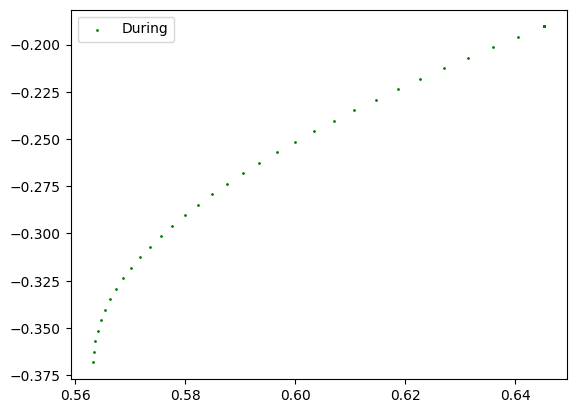

In [81]:
# Initialize the Crtical Line Algorithm object
efficient_portfolio_during = CLA(returns_during, ecov_during)
# Find the minimum volatility portfolio weights and display them
print(efficient_portfolio_during.min_volatility())

# Compute the efficient frontier
(ret, vol, weights) = efficient_portfolio_during.efficient_frontier()

# Add the frontier to the plot showing the 'before' and 'after' frontiers
plt.scatter(vol, ret, s=4, c='g', marker='.', label='During')
plt.legend()
plt.show()